
# Data Augmentation
A common problem is the amount of data available to enter the models, for these to present the expected results it is necessary that the training occurs with a large amount of data (dataset), but in many cases there is no the data needed to perform these tasks.
This is where the ** Data Augmentation ** technique comes in, which, as its name indicates, allows us to augment our dataset in two ways:




* Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, inverting axes ...
* Using different distributions. Example: if we want to train a model to classify high resolution images, we add low resolution images, with noise… always maintaining the highest proportion of high resolution.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.


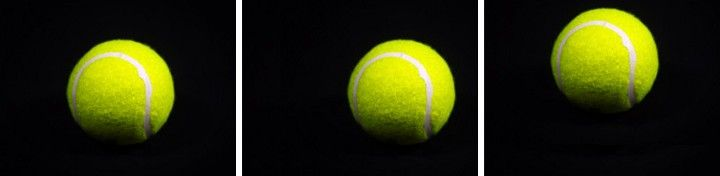



Is the same ball with some transitions



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1. Turn (Flip)
2. Rotation

1. Scale
2. Trim

1. Translation
2. Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



* The changes in the image (translations) through the arguments **width_shift_range**  and  **height_shift_range** .
* Flip the image using the  **horizontal_flip**  and  **vertical_flip** arguments.
* Rotations of images through the argument **rotation_range**
* Image brightness using the  **brightness_range** argument.
* Image zoom using the **zoom_range** argument.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [1]:
import matplotlib.pyplot as plt                        #Library that allows graphing, very MATLAB style
import numpy as np                                        #Library that allows working with arrangement
from numpy import expand_dims                             #Expand array shape
from keras.preprocessing.image import load_img             #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array           # will take an image (PIL) and convert it to an array. If part of a PNG image, the values ​​within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator     #class that takes original data, transforms it randomly, and returns only the new transformed data
from PIL import Image                                      #python image library
from urllib.request import urlopen                         #Allows to read an email address


First we upload an image from the internet


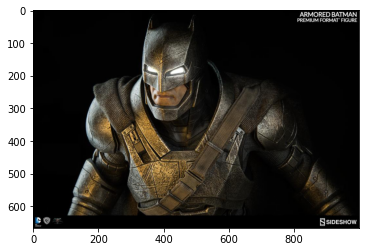

In [2]:
url = 'https://bbts1.azureedge.net/images/p/full/2016/04/b94911d2-5704-4def-87c2-68303e4faefa.jpg'
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)


Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


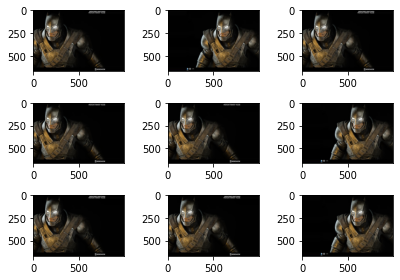

In [4]:
# We convert the image to an arrangement
data = img_to_array(img)
# we expand to a sample
samples = expand_dims(data, 0)
# We create the data augmenter using only image change
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)

# batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8')  # is converted to a valid value so that it can be displayed as an image
	plt.imshow(image)
	plt.tight_layout()
plt.show()


An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The magnification is specified by a Boolean argument   **horizontal_flip**   or **vertical_flip**   for the  **ImageDataGenerator**  class.

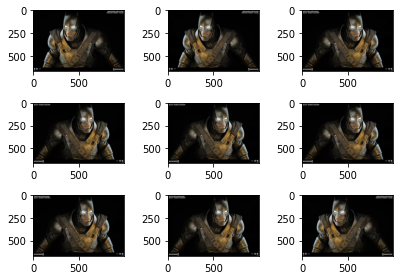

In [5]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()


The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

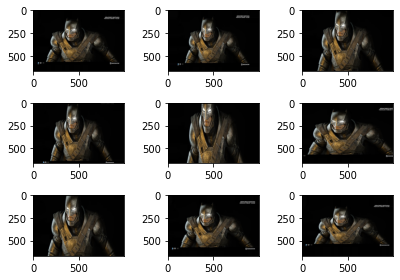

In [7]:
datagen = ImageDataGenerator(zoom_range=.5) #float or Range [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
 
plt.show()


The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame without pixel data, which need to be completed.

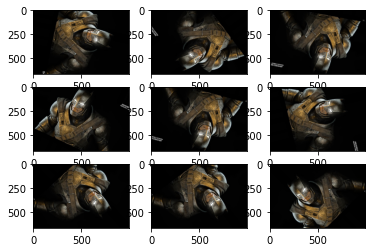

In [8]:
datagen = ImageDataGenerator(rotation_range=220)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.




featurewise_center: Boolean, set the mean of each element to zero of all data.
              samplewise_center **: Boolean, set the mean of each sample to zero
              featurewise_std_normalization: Boolean, Divide the inputs by the standard deviation (std.) of the data set, based on the characteristics.
              samplewise_std_normalization: Boolean, divide each data by its std.
              zca_epsilon: The default is 1e-6.
              zca_whitening: Boolean, indicates if ZCA whitening is applied.     

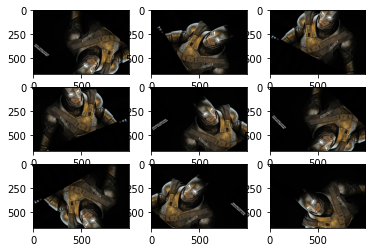

In [9]:
datagen = ImageDataGenerator(
            rotation_range               = 90,      
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following:


1. Text Attack
2. Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.


In [6]:
!pip install textattack

     |████████████████████████████████| 327kB 5.0MB/s 
     |████████████████████████████████| 102kB 6.3MB/s 
     |████████████████████████████████| 153kB 12.6MB/s 
     |████████████████████████████████| 778kB 14.1MB/s 
     |████████████████████████████████| 245kB 30.8MB/s 
     |████████████████████████████████| 1.7MB 32.2MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 317kB 42.6MB/s 
     |████████████████████████████████| 1.1MB 33.3MB/s 
     |████████████████████████████████| 235kB 45.1MB/s 
     |████████████████████████████████| 3.0MB 29.3MB/s 
     |████████████████████████████████| 686kB 35.5MB/s 
     |████████████████████████████████| 245kB 41.3MB/s 
     |████████████████████████████████| 17.3MB 232kB/s 
     |████████████████████████████████| 276kB 45.4MB/s 
     |████████████████████████████████| 983kB 39.2MB/s 
     |████████████████████████████████| 798kB 40.8MB/s

In [7]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 19:19:37 INFO: Downloading default packages for language: en (English)...
2020-10-16 19:23:15 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [25]:
text = "Will you look back on life and say, I wish I had, or I’m glad I did?"
text = "هل ستلقي نظرة على الحياة وتقول ، أتمنى لو فعلت ذلك ، أم أنني سعيد لأنني فعلت ذلك؟"
text = "Will you look back on life and say, I wish I had, or I’m glad I did?"

text = "Will you look back on life and say, I wish I had, or I’m glad I did?"
text = "당신은 인생을 되돌아보고 내가 있었으면 좋겠어요, 아니면 기뻐요?"
text = "Will you look back on life and say, I wish I had, or I’m glad I did?"

text = "Will you look back on life and say, I wish I had, or I’m glad I did?"
text =  "«Вы оглянетесь на жизнь и скажете:« Хотел бы я этого или я рад, что сделал »?"
text = "Will you look back on life and say, I wish I had, or I’m glad I did?"



TextAttack provides us with four methods for data augmentation.


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.



In [26]:
aug = WordNetAugmenter();
aug.augment(text)

['Will you look back on life and say, ane wish I had, or I’m glad I did?']


## EmbeddingAugmenter
Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.



In [27]:
aug = EmbeddingAugmenter();
aug.augment(text)

['Will you look back on life and said, I wish I had, or I’m glad I did?']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.


In [28]:
aug = CharSwapAugmenter()
aug.augment(text)

['Will you look back on life and asy, I wish I had, or I’m glad I did?']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [29]:
aug = EasyDataAugmenter()
aug.augment(text)

['Will you look back on life and say, I wish I had, or I’m glad did?',
 'Will had look back on life and say, I wish I you, or I’m glad I did?',
 'Will you look back on aliveness and say, I wish I had, or I’m glad I did?',
 'Will you look back on life and say throw, I wish I had, or I’m glad I did?']


Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the  **translate** ()  method are:



1. **src** : source language. this parameter is optional as **googletrans**  will detect it.
2.  **dest** : target language. Mandatory parameter.

1. **text** : the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.


The supported languages ​​can be consulted at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.



Some examples of languages:


* Afrikaans 'af'

* Chinese (simplified) 'zh-CN or zh'

* Esperanto 'eo'

* Japanese 'ha'
* Latin 'la'


*   Spanish people'


* Turkmen 'tk'


* Yiddish 'yi'

* Zulu 'zu'


In [34]:
!pip install googletrans

In [35]:
from googletrans import Translator
translator = Translator()

In [38]:
origin_text = " The man who has no imagination, has no wings   "
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

 The man who has no imagination, has no wings   
Indoda engenakho ukucabanga, ayinazimpiko
A man without thought, has no wings
